In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [ ]:
#gathering more info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

no null entries  
two features are object types  
one int type and all other float types  

In [ ]:
len(df['Happiness Score'].unique())

157

 by looking number of unique values and the type of data also considering all other cenarios we can say that  it is a regression problem

In [ ]:
#checking null values
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no null values are present in dataset

In [ ]:
#checking any space value in data set
for i in df.columns:
  print('-----------------','\n',i)
  temp=df[i]==' '
  print(temp.unique())


----------------- 
 Country
[False]
----------------- 
 Region
[False]
----------------- 
 Happiness Rank
[False]
----------------- 
 Happiness Score
[False]
----------------- 
 Standard Error
[False]
----------------- 
 Economy (GDP per Capita)
[False]
----------------- 
 Family
[False]
----------------- 
 Health (Life Expectancy)
[False]
----------------- 
 Freedom
[False]
----------------- 
 Trust (Government Corruption)
[False]
----------------- 
 Generosity
[False]
----------------- 
 Dystopia Residual
[False]


No space enrties found

In [ ]:
#checking empty data with other notation
for i in df.columns:
  print('-------------------','\n',i)
  temp=df[i]=='-'
  print(temp.unique())


------------------- 
 Country
[False]
------------------- 
 Region
[False]
------------------- 
 Happiness Rank
[False]
------------------- 
 Happiness Score
[False]
------------------- 
 Standard Error
[False]
------------------- 
 Economy (GDP per Capita)
[False]
------------------- 
 Family
[False]
------------------- 
 Health (Life Expectancy)
[False]
------------------- 
 Freedom
[False]
------------------- 
 Trust (Government Corruption)
[False]
------------------- 
 Generosity
[False]
------------------- 
 Dystopia Residual
[False]


no empty data with other notation

In [ ]:
#checking how much unique data in individual features
for i in df.columns:
  print('-----------------------------------------','\n',df[i].value_counts())

----------------------------------------- 
 Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64
----------------------------------------- 
 Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
----------------------------------------- 
 82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64
----------------------------------------- 
 5.192    2
7.587    1
4.686    1
4.839    

mostly all data points are unique except region

In [ ]:
#data distribution
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


it looks like fisshy with minimum value in economy, family, health, freedom, trust, Generosiyt  
every country have some minimum value in all feature that i have mentioned above, it can't be zero

In [ ]:
df['Happiness Rank']=df['Happiness Rank'].astype(float)

In [ ]:
contivar=[col for col in df.columns if df[col].dtype=='float64']

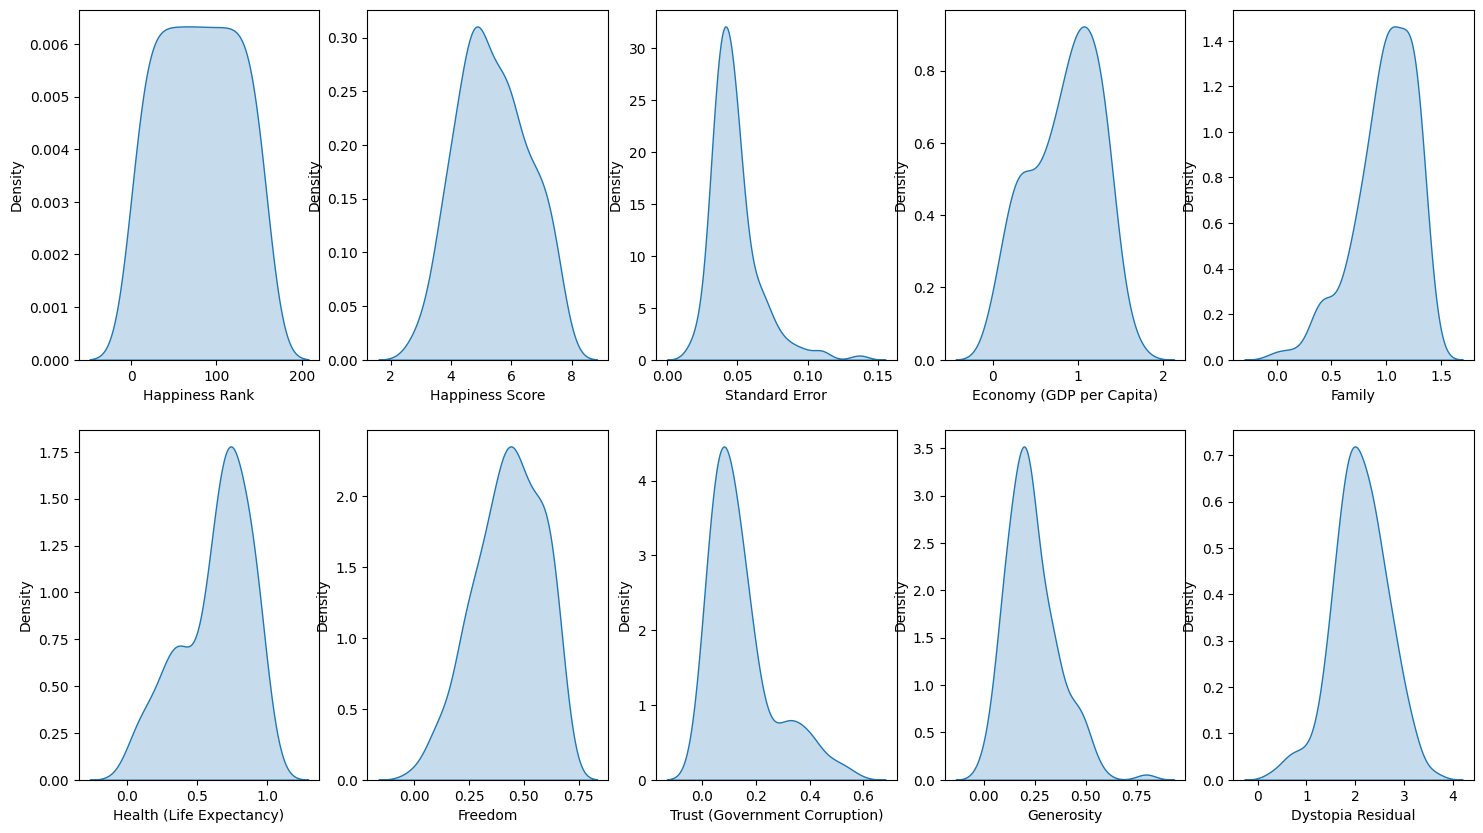

In [ ]:
#ploting data distribuation
plt.figure(figsize=(18,10))
plotno=1
for i in contivar:
  plt.subplot(2,5,plotno)
  sns.kdeplot(df[i],shade=True)
  plotno+=1
plt.show()

the standard error and trust is slightly right skewed  
family data slightly left skewed

In [ ]:
#checking skewness
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

as we obsvered in distribution plot the feature i mentioned are skewed   
but here we can see one more feature is skewed which is Generosity  


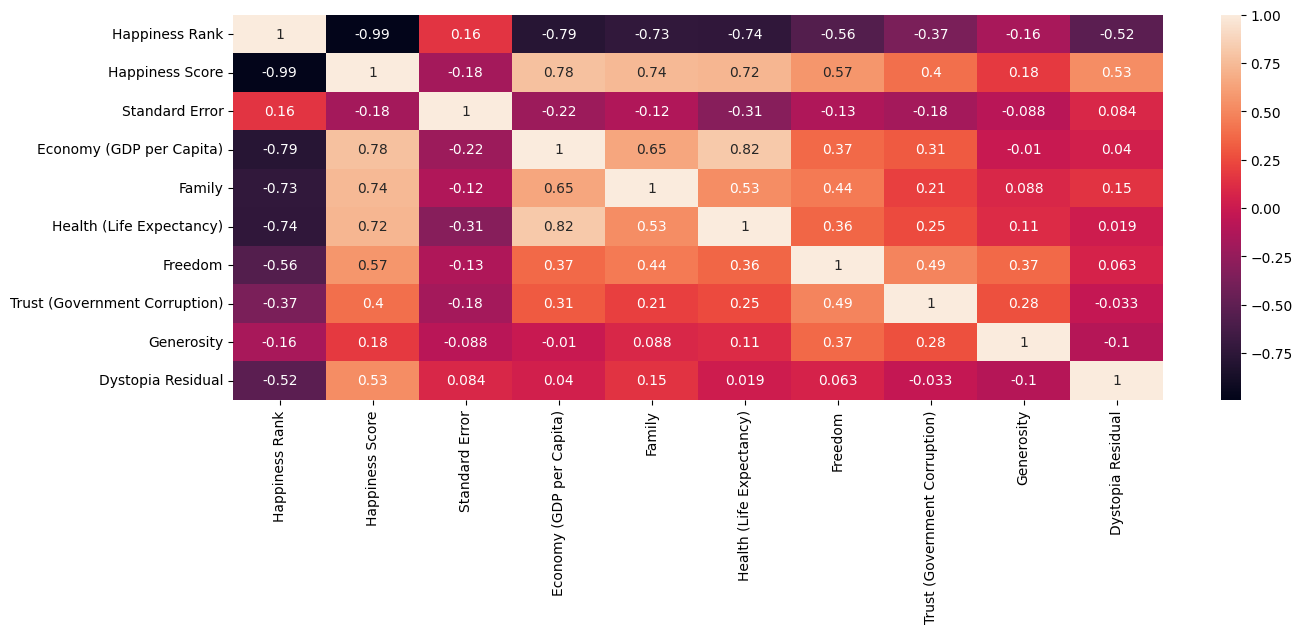

In [ ]:
#checking correlation
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

1)Happines rank is strong negative correlation with health, family, economy, happiness score  
2)Standard error is strong positively correlation with Dystopia Residual and strong negative correlation with Generosity  
3)Economy is strong positively correlation with health, family, happiness score  and  strong negative correlation with happiness rank    

4)Family is strong positively correlation with Generosity, Economy, happiness score and strong negative correlation with happiness rank  
5)Health is strong positively correlation with Economy, happiness score, and strong  negative correlation with happiness rank    
6)Freedom is strong positively correlation with Dystopia Residual happiness score, and  strong negative correlation with happiness rank    


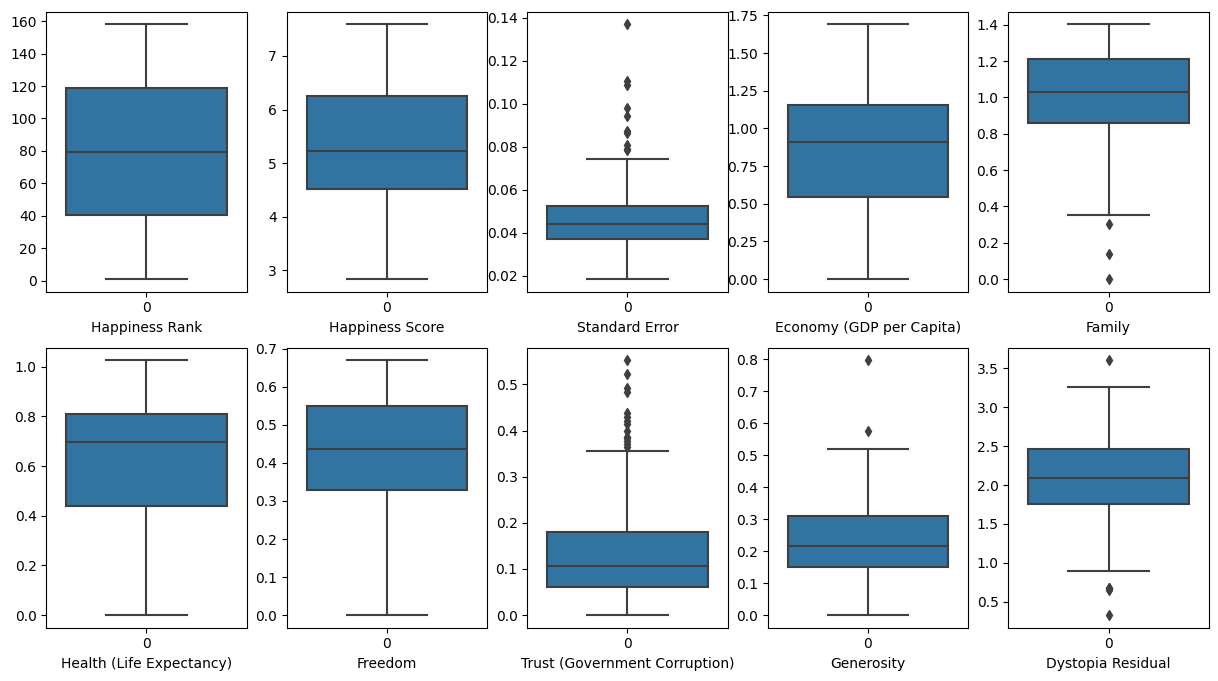

In [ ]:
#checking outliers
plt.figure(figsize=(15,8))
plotno=1
for i in contivar:
  plt.subplot(2,5,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

Outliers are present in standard error and trust but

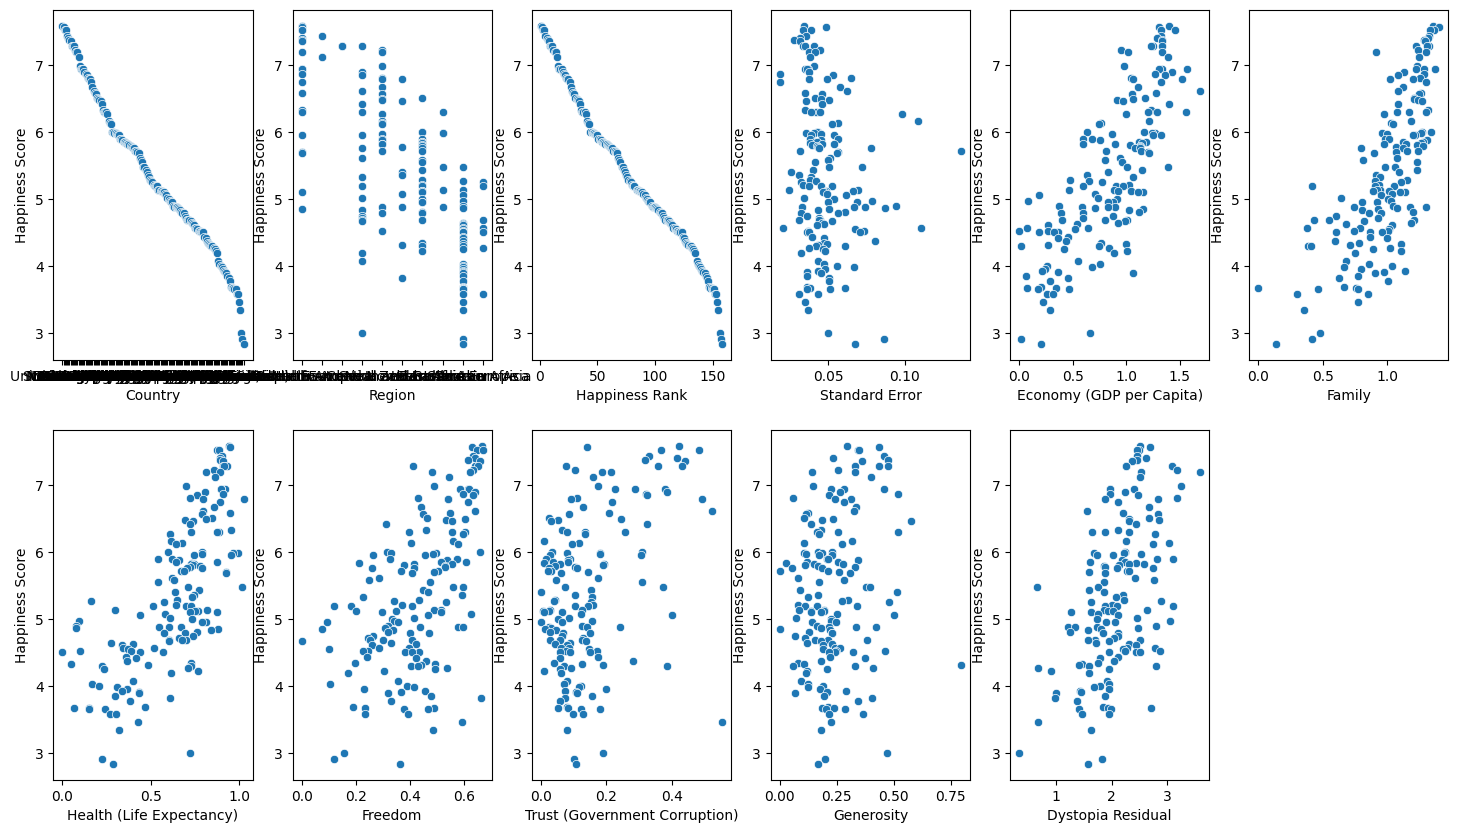

In [ ]:
#ploting relationship of all features with happiness score
plt.figure(figsize=(18,10))
#plt.title('Features Relationship with Label')
plotno=1
for i in df.columns:
  if i=='Happiness Score':
    continue
  else:
    plt.subplot(2,6,plotno)
    sns.scatterplot(x=df[i],y=df['Happiness Score'])
    #sns.lineplot(x=df[i],y=df['Happiness Score'])
    plt.xlabel(i)
    plt.ylabel('Happiness Score')
    plotno+=1
plt.show()

1)As score decreasing rank is going down  
2)Standard error and Generosity not having strong relation with happiness score  
3) I dont think so we have to consider country and region so we are not discussing  
4)Economy, Family, Health , Freedom and Dystopia Residual features have strong positive relation with happiness score

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


**Encoding feature**

In [ ]:
#importing binary encoder
from category_encoders import BinaryEncoder

In [ ]:
encode=BinaryEncoder(cols=['Region'])
df_region_encoded=encode.fit_transform(df)


In [ ]:
df_region_encoded

,Country,Region_0,Region_1,Region_2,Region_3,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,0,0,0,1,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,0,0,0,1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,0,0,0,1,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,0,0,0,1,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,0,0,1,0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,1,0,0,1,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,1,0,0,1,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,0,1,0,0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,1,0,0,1,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
feature=['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Dystopia Residual','Freedom','Generosity','Health (Life Expectancy)','Trust (Government Corruption)']

In [ ]:
#checking multicollinearity
multi_collinearity=pd.DataFrame()
multi_collinearity['vif score']=[variance_inflation_factor(df[feature].values,i) for i in range(len(feature))]
multi_collinearity['features']=feature
multi_collinearity

,vif score,features
0,4.129728,Happiness Rank
1,9.795542,Standard Error
2,24.157105,Economy (GDP per Capita)
3,26.022152,Family
4,12.577143,Dystopia Residual
5,15.887615,Freedom
6,5.683814,Generosity
7,23.623842,Health (Life Expectancy)
8,3.498336,Trust (Government Corruption)


as we observed in heatmap economy is correlated with family and health so we are not using economy further

In [ ]:
feature1=['Happiness Rank','Standard Error','Family','Dystopia Residual','Freedom','Generosity','Health (Life Expectancy)','Trust (Government Corruption)']

In [ ]:
#after deleting economy feature
multi_collinearity=pd.DataFrame()
multi_collinearity['vif score']=[variance_inflation_factor(df[feature1].values,i) for i in range(len(feature1))]
multi_collinearity['features']=feature1
multi_collinearity

,vif score,features
0,3.719922,Happiness Rank
1,9.592846,Standard Error
2,21.565573,Family
3,12.330635,Dystopia Residual
4,15.883010,Freedom
5,5.351854,Generosity
6,11.216056,Health (Life Expectancy)
7,3.363112,Trust (Government Corruption)


In [ ]:
df_region_encoded.drop('Country',axis=1,inplace=True)

In [ ]:
#split feature and label
x=df_region_encoded.drop('Happiness Score',axis=1)
y=df_region_encoded['Happiness Score']

In [ ]:
#feature scaling
scal=StandardScaler()
X_scal=scal.fit_transform(x)

In [ ]:
#spliting data for training and testing
x_train,x_test,y_train,y_test=train_test_split(X_scal,y)

In [ ]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def build_model(model,train_x,train_y,test_x,test_y):
  trained_model=model.fit(train_x,train_y)
  print('---------Training Score------------')
  y_pred_train=trained_model.predict(train_x)
  print(r2_score(train_y,y_pred_train)*100)
  print('---------Accuracy Score------------')
  y_pred_test=trained_model.predict(test_x)
  print(r2_score(test_y,y_pred_test)*100)
  print('-------Mean Absulate Error----------')
  print(mean_absolute_error(test_y,y_pred_test))


In [ ]:
#building linearregressor
lm=LinearRegression()
build_model(lm,x_train,y_train,x_test,y_test)

---------Training Score------------
99.99999418511206
---------Accuracy Score------------
99.99999427593431
-------Mean Absulate Error----------
0.00027729130494670297


In [ ]:
#building svr
svr=SVR()
build_model(svr,x_train,y_train,x_test,y_test)

---------Training Score------------
98.72924918881746
---------Accuracy Score------------
96.02784769067276
-------Mean Absulate Error----------
0.17400075928578315


In [ ]:
#building randomforestregressor
rfr=RandomForestRegressor()
build_model(rfr,x_train,y_train,x_test,y_test)

---------Training Score------------
99.92343357593428
---------Accuracy Score------------
99.4636831309608
-------Mean Absulate Error----------
0.05057650000000071


In [ ]:
#building Adaboostregressor
adr=AdaBoostRegressor()
build_model(adr,x_train,y_train,x_test,y_test)

---------Training Score------------
99.83195579626006
---------Accuracy Score------------
99.44099763450545
-------Mean Absulate Error----------
0.06055224601237249


In [ ]:
#building GradientBoostingRegressor
gbr=GradientBoostingRegressor()
build_model(gbr,x_train,y_train,x_test,y_test)

---------Training Score------------
99.99969392508665
---------Accuracy Score------------
99.7620882224884
-------Mean Absulate Error----------
0.04138466276280182


In [ ]:
#building XGBRegressor
xb=XGBRegressor()
build_model(xb,x_train,y_train,x_test,y_test)

---------Training Score------------
99.99996806757905
---------Accuracy Score------------
99.75164512747064
-------Mean Absulate Error----------
0.045083391046524125


In [ ]:
#building KNeighborsRegressor
knr=KNeighborsRegressor()
build_model(knr,x_train,y_train,x_test,y_test)

---------Training Score------------
90.97812630622713
---------Accuracy Score------------
89.39155795914462
-------Mean Absulate Error----------
0.35171500000000006


**Cross Validation**

In [ ]:
def cross_score(alg,x,y,x_test,y_test,n):
  cv=cross_val_score(alg,x,y,cv=n)
  print('---Cross Validation Mean-----')
  cvmean=(cv.mean()*100)
  print('%2.2f'%cvmean)
  print('---r2_score of model-----')
  r2=r2_score(y_test,alg.predict(x_test))*100
  print('%2.2f'%r2)
  print('---Difference between r2 score and cross val score---')
  print('%2.2f'%(cvmean-r2))

In [ ]:
#cross validation of LinearRegressor
cross_score(lm,x,y,x_test,y_test,10)

---Cross Validation Mean-----
100.00
---r2_score of model-----
100.00
---Difference between r2 score and cross val score---
-0.00


In [ ]:
#cross validation of svr
cross_score(svr,x,y,x_test,y_test,10)

---Cross Validation Mean-----
0.23
---r2_score of model-----
96.03
---Difference between r2 score and cross val score---
-95.80


In [ ]:
#cross validation of randomforestregressor
cross_score(rfr,x,y,x_test,y_test,10)

---Cross Validation Mean-----
-146.27
---r2_score of model-----
99.46
---Difference between r2 score and cross val score---
-245.74


In [ ]:
#cross validation of Adaboostregressor
cross_score(adr,x,y,x_test,y_test,10)

---Cross Validation Mean-----
-407.46
---r2_score of model-----
99.44
---Difference between r2 score and cross val score---
-506.90


In [ ]:
#cross validation of GradientBoostingRegressor
cross_score(gbr,x,y,x_test,y_test,10)

---Cross Validation Mean-----
-86.64
---r2_score of model-----
99.76
---Difference between r2 score and cross val score---
-186.40


In [ ]:
#cross validation of XGBRegressor
cross_score(xb,x,y,x_test,y_test,10)

---Cross Validation Mean-----
-319.30
---r2_score of model-----
99.75
---Difference between r2 score and cross val score---
-419.06


In [ ]:
#cross validation of KNeighborsRegressor
cross_score(knr,x,y,x_test,y_test,10)

---Cross Validation Mean-----
-106.27
---r2_score of model-----
89.39
---Difference between r2 score and cross val score---
-195.66


As per analysis Liniear Rgeressor looks perfect and even no need to tune the model

In [ ]:
#Saving Model
import pickle
pickle.dump(lm,open('Linearregressor_to_detect_happiness_score.sav','wb'))

In [ ]:
lm_happy=pickle.load(open('Linearregressor_to_detect_happiness_score.sav','rb'))

In [ ]:
out=pd.DataFrame()
out['y_pred']=lm_happy.predict(x_test)
out['y_test']=y_test.values

In [ ]:
out

,y_pred,y_test
0,4.296761,4.297
1,3.667251,3.667
2,4.270721,4.271
3,7.283957,7.284
4,6.982557,6.983
5,5.140333,5.140
6,6.901323,6.901
7,4.959458,4.959
8,4.787874,4.788
9,5.252907,5.253


**The End**